# Import depends

In [8]:
import keras
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import preprocessing

import tensorflow as tf

In [17]:
print('tf.__version__:', tf.__version__)
print('tf.keras.__version__:', tf.keras.__version__)
print('keras.__version__:', keras.__version__)

tf.__version__: 1.7.0
tf.keras.__version__: 2.1.5-tf
keras.__version__: 2.1.5


# Save / Restore model

# Prepare dataset
more about data set https://www.cs.toronto.edu/~kriz/cifar.html
- related challange on kaggle https://www.kaggle.com/c/cifar-10/leaderboard
- manual classification by Andrej Karpathy http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/

In [2]:
# util functions
def grid_of_images(cols, rows, image_callback, grid_width=8):
    """
    Show images in a grid
    """
    plt.figure(figsize=(grid_width, grid_width / cols * rows))
    gs = gridspec.GridSpec(rows, cols)

    for row_idx in range(rows):
        for col_idx in range(cols):
            plt.subplot(gs[row_idx, col_idx])
            plt.axis('off')
            image, title = image_callback(row_idx, col_idx)
            plt.imshow(image, interpolation='none')
            if title is not None:
                plt.title(title)
    plt.tight_layout()

In [18]:
def flat(dataset):
    flatten_dataset = dataset[:,].flatten()
    return flatten_dataset.reshape(
        dataset.shape[0], 
        dataset.shape[1] * dataset.shape[2] * dataset.shape[3],
    )

def onehot(dataset):
    return np.eye(10)[dataset.reshape(-1)]

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
cifar10_categories = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

# TODO: why do we need this? 
# Got from https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py#L65
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# prepare train and test samples (make it flat)
x_train_flatten = flat(x_train)
x_test_flatten = flat(x_test)

# # make one-hot y (out put) labels
# # y_train_onehot = onehot(y_train)
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
# # y_test_onehot = onehot(y_test)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)

# print(x_train.shape)
# print(x_train_flatten.shape)
# print(y_train.shape)
# print(y_train_onehot.shape)
    
# def get_images_by_category(category_idx):
#     return x_train[np.where(y_train == category_idx)[0]]

# def get_image(category_idx, image_idx):
#     return get_images_by_category(category_idx)[image_idx], cifar10_categories[category_idx] if image_idx == 0 else None

# grid_of_images(5, len(cifar10_categories), get_image, grid_width=8)

def get_images_by_category(category_idx):
    return x_train[np.where(y_train == category_idx)[0]]

def get_image(category_idx, image_idx):
    return get_images_by_category(category_idx)[image_idx], cifar10_categories[category_idx] if image_idx == 0 else None

# grid_of_images(5, len(cifar10_categories), get_image, grid_width=8)

# Model

## Build

In [4]:
model = Sequential()
# model.add(Dense(units=32, activation='relu', input_shape=x_train_flatten.shape[1:]))
# model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam())

## Train

In [19]:
# model.fit(x_train_flatten, y_train_onehot, epochs=5, batch_size=32,
#          validation_data=(x_test_flatten, y_test_onehot))

# interrupt training when the validation loss isn't decreasing anymore 
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

hist = model.fit(x_train, y_train_onehot, epochs=3, batch_size=32, 
                 callbacks=[early_stopping], validation_data=(x_test, y_test_onehot))

print(hist.history)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 209s 4ms/step - loss: 1.5685 - val_loss: 1.2241
Epoch 2/3
50000/50000 [==============================] - 203s 4ms/step - loss: 1.2183 - val_loss: 1.1151
Epoch 3/3
50000/50000 [==============================] - 194s 4ms/step - loss: 1.0819 - val_loss: 1.0045
{'val_loss': [1.2241160591125488, 1.1150799087524415, 1.004454746055603], 'loss': [1.5684755651283264, 1.2182583550643922, 1.081866922454834]}


## Accuracy

In [20]:
# TODO:
# GOT strange bug - evaluate stuck after batch_size iteration. so if our test test has more 
# than batch_size samples it won't never be evaluated.
#
# For the last model it works. 
# So Maybe I got it because didn't divide input vectors on 255 and got overflow

# Score trained model.
model.evaluate(x_test, y_test_onehot, verbose=1)

10000/10000 [==============================] - 10s 1ms/step


1.004454746055603

# Pre-trained Models
https://keras.io/applications/
## ResNet50

TODO: API to fetch images from internet (Google Image Search, 500px, ...) for trying prediction

102858752/102853048 [==============================] - 65s 1us/step


/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


40960/35363 [==================================] - 1s 16us/step
Predicted: [('n03530642', 'honeycomb', 0.80650914), ('n13040303', 'stinkhorn', 0.14985682), ('n02206856', 'bee', 0.013556762)]


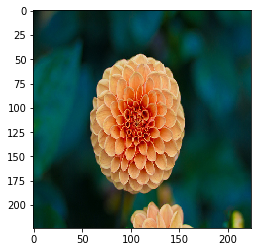

In [21]:
from sklearn.datasets import load_sample_images

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

# scikit-learn images
from PIL import Image
im = Image.fromarray(np.uint8(load_sample_images().images[1]))
im = im.resize((224, 224))
x = np.array(im, dtype=np.float)

# random pixels
# x = np.floor(np.random.random((224, 224, 3)) * 255) 


x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
plt.imshow(im)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

In [22]:
decode_predictions(model.predict(x), top=5)[0]

[('n03530642', 'honeycomb', 0.80650914),
 ('n13040303', 'stinkhorn', 0.14985682),
 ('n02206856', 'bee', 0.013556762),
 ('n12985857', 'coral_fungus', 0.010444899),
 ('n11939491', 'daisy', 0.004267611)]

# VGG16

In [23]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

# scikit-learn images
from PIL import Image
im = Image.fromarray(np.uint8(load_sample_images().images[1]))
im = im.resize((224, 224))
x = np.array(im, dtype=np.float)

# img_path = 'elephant.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

58892288/58889256 [==============================] - 55s 1us/step


/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [26]:
features.shape

(1, 7, 7, 512)